<a href="https://colab.research.google.com/github/Nwosu-Ihueze/vaccine_progression/blob/main/vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting google collab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#Changing working directory
%cd /content/drive/MyDrive/covid/

/content/drive/MyDrive/covid


In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud

In [4]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 9.8MB/s 
     |████████████████████████████████| 6.5MB 36.6MB/s 
     |████████████████████████████████| 15.3MB 216kB/s 


In [5]:
import geopandas

In [8]:
c19 = pd.read_csv('country_vaccinations.csv')

In [9]:
c19.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [10]:
c19.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,7.316000e+03,6.661000e+03,4.784000e+03,6.158000e+03,1.194600e+04,7316.000000,6661.000000,4784.000000,11946.000000
mean,3.946801e+06,2.716129e+06,1.263383e+06,1.228644e+05,7.222971e+04,13.019794,9.686615,4.725422,2852.309057
std,1.561611e+07,9.817144e+06,5.344869e+06,4.582579e+05,3.163995e+05,21.148911,14.097287,9.294781,4869.798727
min,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.076275e+04,4.517400e+04,2.064000e+04,2.783250e+03,9.080000e+02,1.030000,0.960000,0.507500,331.000000
50%,3.491235e+05,2.883190e+05,1.448750e+05,1.487900e+04,5.941000e+03,5.015000,3.940000,1.840000,1398.000000
75%,1.641268e+06,1.196551e+06,5.955172e+05,5.897575e+04,2.712425e+04,15.817500,11.730000,4.840000,3567.500000
max,2.022829e+08,1.277431e+08,8.060982e+07,7.185000e+06,5.190143e+06,196.590000,106.350000,90.240000,118759.000000


In [11]:
c19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12156 entries, 0 to 12155
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              12156 non-null  object 
 1   iso_code                             12156 non-null  object 
 2   date                                 12156 non-null  object 
 3   total_vaccinations                   7316 non-null   float64
 4   people_vaccinated                    6661 non-null   float64
 5   people_fully_vaccinated              4784 non-null   float64
 6   daily_vaccinations_raw               6158 non-null   float64
 7   daily_vaccinations                   11946 non-null  float64
 8   total_vaccinations_per_hundred       7316 non-null   float64
 9   people_vaccinated_per_hundred        6661 non-null   float64
 10  people_fully_vaccinated_per_hundred  4784 non-null   float64
 11  daily_vaccinations_per_milli

In [12]:
c19.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     4840
people_vaccinated                      5495
people_fully_vaccinated                7372
daily_vaccinations_raw                 5998
daily_vaccinations                      210
total_vaccinations_per_hundred         4840
people_vaccinated_per_hundred          5495
people_fully_vaccinated_per_hundred    7372
daily_vaccinations_per_million          210
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [13]:
c19["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Honduras',
       'Hong Kong', 'Hungary', 'Icelan

In [14]:
africa = [
          "Algeria",
          "Angola",
          "Benin",
          "Bostwana",
          "Burkina Faso",
          "Burundi",
          "Cameroon",
          "Cape Verde"
          "Central African Republic",
          "Chad",
          "Comoros"
          "Congo",
          "Cote d'Ivore",
          "Democratic Republic of Congo",
          "Djibouti",
          "Egypt",
          "Equatorial Guinea",
          "Eriteria",
          "Eswatini"
          "Ethiopia",
          "Fiji",
          "Gabon",
          "Gambia",
          "Ghana",
          "Guinea", 
          "Guinea-Bissau", 
          "Kenya",
          "Lesotho", 
          "Liberia", 
          "Libya", 
          "Madagascar", 
          "Malawi", 
          "Mali",
          "Mauritania", 
          "Mauritius", 
          "Morocco", 
          "Mozambique", 
          "Namibia",
          "Niger",
          "Nigeria",  
          "Rwanda",
          "Sao Tome and Principe", 
          "Senegal",
          "Seychelles", 
          "Sierra Leone", 
          "Somalia", 
          "South Africa",
          "South Sudan", 
          "Sudan", 
          "Tanzania",
          "Togo", 
          "Tunisia", 
          "Uganda", 
          "Zambia", 
          "Zimbabwe"
]

In [16]:
africa_in_df=[coun for i,coun in enumerate(africa) if coun in c19["country"].unique()]

In [17]:
africa_in_df

['Algeria',
 'Angola',
 'Cameroon',
 'Egypt',
 'Equatorial Guinea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Kenya',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nigeria',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe']

In [18]:
new_c19 = c19.groupby(["country",'iso_code','vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated',
                                           'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           "people_fully_vaccinated_per_hundred",'daily_vaccinations_per_million'].max().reset_index()
new_c19.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,iso_code,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,Oxford/AstraZeneca,120000.0,120000.0,NaN,3000.0,0.31,0.31,NaN,77.0
1,Albania,ALB,"Pfizer/BioNTech, Sinovac",314622.0,6073.0,655.0,17346.0,10.93,0.21,0.02,6028.0
2,Algeria,DZA,Sputnik V,75000.0,NaN,NaN,3748.0,0.17,NaN,NaN,85.0
3,Andorra,AND,"Oxford/AstraZeneca, Pfizer/BioNTech",19064.0,9781.0,4484.0,679.0,24.67,12.66,5.80,8788.0
4,Angola,AGO,Oxford/AstraZeneca,245442.0,245442.0,NaN,10939.0,0.75,0.75,NaN,333.0
5,Anguilla,AIA,Oxford/AstraZeneca,5835.0,5835.0,NaN,331.0,38.89,38.89,NaN,22064.0
6,Antigua and Barbuda,ATG,Oxford/AstraZeneca,27032.0,27032.0,NaN,895.0,27.60,27.60,NaN,9139.0
7,Argentina,ARG,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",6093016.0,5305604.0,787412.0,169014.0,13.48,11.74,1.74,3740.0
8,Armenia,ARM,Sputnik V,565.0,565.0,NaN,NaN,0.02,0.02,NaN,NaN
9,Australia,AUS,"Oxford/AstraZeneca, Pfizer/BioNTech",1420577.0,159294.0,NaN,54243.0,5.57,0.62,NaN,2127.0


In [20]:
vac = c19[c19['country'].isin(africa_in_df)]
vac = vac.sort_values(by="people_vaccinated_per_hundred",ascending=False,ignore_index=True)
unique_country_vac_list = []

country = []
value = []
for i in range(len(africa_in_df)):
    a = vac.iloc[0]["country"]
    b = vac.iloc[0]["people_vaccinated_per_hundred"]
    country.append(a)
    value.append(b)
    vac = vac.drop(vac[vac["country"]==a].index)
    vac = vac.reset_index(drop=True)


def make_time(date):
    date = str(date).split(" ")[0]
    return date.replace("-","")

def date_count(date):
    return len(dt[dt["date"]==date])



vac_process= c19[c19['country'].isin(country[0:5])]

dt = vac_process[~vac_process["people_vaccinated_per_hundred"].isnull()][["country","date","people_vaccinated_per_hundred"]]
dt["date"] = dt["date"].map(make_time)

dt["date_count"] = dt["date"].apply(date_count)

dt = dt[dt["date_count"]==5]   


In [21]:
vac = c19[c19['country'].isin(africa_in_df)]

In [23]:
data = new_c19[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries",)
fig.show()

In [26]:
vac_type = c19.groupby(['vaccines'])['iso_code'].unique()
vac_type = vac_type.reset_index()
vac_type

,vaccines,iso_code
0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[MEX]
1,"Covaxin, Oxford/AstraZeneca",[IND]
2,"EpiVacCorona, Sputnik V",[RUS]
3,Johnson&Johnson,[ZAF]
4,"Johnson&Johnson, Moderna, Pfizer/BioNTech",[USA]
5,"Moderna, Oxford/AstraZeneca","[GTM, HND]"
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","[AUT, BEL, BGR, CAN, HRV, CZE, DNK, EST, FIN, ..."
7,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[HUN]
8,"Moderna, Pfizer/BioNTech","[FRO, ISR, LIE, SGP, CHE]"
9,Oxford/AstraZeneca,"[AFG, AGO, AIA, ATG, BHS, BGD, BRB, BLZ, BTN, ..."


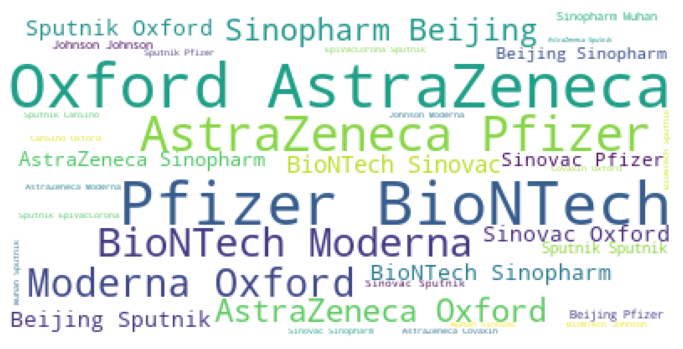

In [27]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(c19.vaccines))

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [28]:
countries = c19.country.unique()
t_vac = sum(c19['total_vaccinations'])
t_vac


# Total Vaccinations for countries

total = {}
for country in countries:
    sumC = 0
    for index, row in c19.iterrows():
        if row['country'] == country:
            sumC = sumC + row['total_vaccinations']
    total[country] = sumC
total

{'Afghanistan': nan,
 'Albania': nan,
 'Algeria': nan,
 'Andorra': nan,
 'Angola': nan,
 'Anguilla': nan,
 'Antigua and Barbuda': nan,
 'Argentina': nan,
 'Armenia': 565.0,
 'Australia': 24297967.0,
 'Austria': 82798498.0,
 'Azerbaijan': nan,
 'Bahamas': nan,
 'Bahrain': nan,
 'Bangladesh': nan,
 'Barbados': nan,
 'Belarus': nan,
 'Belgium': nan,
 'Belize': nan,
 'Bermuda': nan,
 'Bhutan': 8782848.0,
 'Bolivia': nan,
 'Bosnia and Herzegovina': nan,
 'Botswana': nan,
 'Brazil': nan,
 'Brunei': nan,
 'Bulgaria': nan,
 'Cambodia': nan,
 'Cameroon': 400.0,
 'Canada': 282411006.0,
 'Cape Verde': nan,
 'Cayman Islands': nan,
 'Chile': 454963345.0,
 'China': nan,
 'Colombia': nan,
 'Costa Rica': nan,
 "Cote d'Ivoire": nan,
 'Croatia': nan,
 'Cyprus': nan,
 'Czechia': 86836049.0,
 'Denmark': 63468770.0,
 'Dominica': nan,
 'Dominican Republic': nan,
 'Ecuador': nan,
 'Egypt': nan,
 'El Salvador': nan,
 'England': nan,
 'Equatorial Guinea': nan,
 'Estonia': nan,
 'Eswatini': nan,
 'Ethiopia': 43

In [29]:
vac_per_country = c19[['country', 'iso_code','vaccines']]
temp_filter_mask = vac_per_country.duplicated()
filter_mask = [not index for index in temp_filter_mask]
unique_country = vac_per_country[filter_mask]
unique_country

,country,iso_code,vaccines
0,Afghanistan,AFG,Oxford/AstraZeneca
45,Albania,ALB,"Pfizer/BioNTech, Sinovac"
141,Algeria,DZA,Sputnik V
163,Andorra,AND,"Oxford/AstraZeneca, Pfizer/BioNTech"
241,Angola,AGO,Oxford/AstraZeneca
...,...,...,...
11898,Venezuela,VEN,Sputnik V
11953,Vietnam,VNM,Oxford/AstraZeneca
11993,Wales,OWID_WLS,"Oxford/AstraZeneca, Pfizer/BioNTech"
12096,Zambia,ZMB,Oxford/AstraZeneca


In [31]:
unique_country_list = []

def transform_vacs_to_vac(data):
    # If the country uses only one type of vaccine brand, directly insert to new dataframe.
    # Else split them and insert to new dataframe separately
    
    if "," in data['vaccines']:
        vacs = data['vaccines'].split(", ")
        
        for vac in vacs:
            temp = {'country': data['country'], 'iso_code': data['iso_code'], 'vaccines': vac}
            unique_country_list.append(temp)
    else:
        temp = {'country': data['country'], 'iso_code': data['iso_code'], 'vaccines': data['vaccines']}
        unique_country_list.append(temp)
    
for index, row in unique_country.iterrows():
    transform_vacs_to_vac(row)

unique_country_vac = pd.DataFrame(unique_country_list)
unique_country_vac.tail(10)

,country,iso_code,vaccines
319,United States,USA,Pfizer/BioNTech
320,Uruguay,URY,Pfizer/BioNTech
321,Uruguay,URY,Sinovac
322,Uzbekistan,UZB,Oxford/AstraZeneca
323,Venezuela,VEN,Sputnik V
324,Vietnam,VNM,Oxford/AstraZeneca
325,Wales,OWID_WLS,Oxford/AstraZeneca
326,Wales,OWID_WLS,Pfizer/BioNTech
327,Zambia,ZMB,Oxford/AstraZeneca
328,Zimbabwe,ZWE,Sinopharm/Beijing


In [32]:
c19.groupby("date").sum()[["daily_vaccinations","people_vaccinated","people_fully_vaccinated"]].reset_index()

,date,daily_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-12-14,0.0,0.0,0.0
1,2020-12-15,718.0,28500.0,0.0
2,2020-12-16,192366.0,0.0,0.0
3,2020-12-17,193256.0,0.0,0.0
4,2020-12-18,193649.0,0.0,0.0
...,...,...,...,...
119,2021-04-12,18256576.0,456462406.0,173895613.0
120,2021-04-13,18722324.0,464831022.0,182358507.0
121,2021-04-14,18531349.0,463607371.0,184152533.0
122,2021-04-15,17580277.0,484595494.0,190670820.0


In [33]:
df_per = c19[c19['country'].isin(africa_in_df)]

In [34]:
df_per

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
141,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
142,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
143,Algeria,DZA,2021-01-31,NaN,NaN,NaN,NaN,1889.0,NaN,NaN,NaN,43.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
144,Algeria,DZA,2021-02-01,NaN,NaN,NaN,NaN,2509.0,NaN,NaN,NaN,57.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
145,Algeria,DZA,2021-02-02,NaN,NaN,NaN,NaN,2819.0,NaN,NaN,NaN,64.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,Zimbabwe,ZWE,2021-04-12,234579.0,205275.0,29304.0,11087.0,12724.0,1.58,1.38,0.20,856.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12152,Zimbabwe,ZWE,2021-04-13,248355.0,218516.0,29839.0,13776.0,12246.0,1.67,1.47,0.20,824.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12153,Zimbabwe,ZWE,2021-04-14,262128.0,231632.0,30496.0,13773.0,11816.0,1.76,1.56,0.21,795.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12154,Zimbabwe,ZWE,2021-04-15,285881.0,252932.0,32949.0,23753.0,13172.0,1.92,1.70,0.22,886.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...


In [35]:
unique_country_vac = pd.DataFrame(unique_country_list)
unique_country_vac.tail(10)

,country,iso_code,vaccines
319,United States,USA,Pfizer/BioNTech
320,Uruguay,URY,Pfizer/BioNTech
321,Uruguay,URY,Sinovac
322,Uzbekistan,UZB,Oxford/AstraZeneca
323,Venezuela,VEN,Sputnik V
324,Vietnam,VNM,Oxford/AstraZeneca
325,Wales,OWID_WLS,Oxford/AstraZeneca
326,Wales,OWID_WLS,Pfizer/BioNTech
327,Zambia,ZMB,Oxford/AstraZeneca
328,Zimbabwe,ZWE,Sinopharm/Beijing


In [37]:
fig = px.bar(c19, x=africa_in_df[0:20], y=value[0:20],color=africa_in_df[0:20], title= "Top 20 countries with vaccination rates",)
fig.show()

In [39]:
fig = px.choropleth(
    df_per,                            # Input Dataframe
    locations="iso_code",           # identify country code column
    color="total_vaccinations",                     # identify representing column
    hover_name="country",              # identify hover name
    animation_frame="date",
    #category_orders={"frame": list(sorted(tdf['date'].unique()))},            # identify date column
    color_continuous_scale= 'viridis',
    projection="azimuthal equal area",        # select projection
    range_color=[0,5000000],
    title='<span style="font-size:36px; font-family:Times New Roman">Total vaccination in AFRICA</span>',
)             # select range of dataset     
fig.show()

In [41]:
NGN = c19[c19['iso_code']== 'NGN']
NGN['cummulative'] = NGN['total_vaccinations'].cumsum()
fig = px.line(NGN, x="date", y="cummulative", title='Cummulative Daily Vaccinations across World')
fig.show()

In [43]:
fig = px.line(NGN, x="date", y="people_vaccinated", title='Cummulative Vaccinations Nigeria')
fig.show()